In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import MissingIndicator,SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount("/content/drive")#HER TO GET DATA FROM MY DRIVE

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/data/bank-full.csv") #transfer data cv to pandas

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
X=data.drop(["y"],axis=1)
y=data["y"].replace(["yes","no"],[1,0])

In [6]:
X['housing']=X['housing'].replace(["yes","no"],[1,0])
X['loan']=X['loan'].replace(["yes","no"],[1,0])
X['default']=X['default'].replace(["yes","no"],[1,0])

In [7]:
from sklearn import metrics
X_=X[["age",'balance','duration','pdays','default','housing','loan',"day"]]

In [ ]:
#this is for ony varibale quantite
select=RFECV(SGDClassifier(random_state=0),
             cv=5,
             min_features_to_select=2,
             step=1
             
             )
select.fit_transform(X_,y)
select.ranking_

array([3, 6, 5, 7, 1, 2, 1, 4])

her we see the rank we  chose only variable have lot of rank in my case i chose all varibales

```
# This is formatted as code
```



In [ ]:
X_=X[['age','balance','duration','pdays','default','housing','loan','day']]#data without minmu rank because the minimum is not itressed me i taked the last is 1
#chose best parametre for calssfier
param={"n_neighbors":np.arange(1,50)}
grid=GridSearchCV(KNeighborsClassifier(),param,cv=50,scoring="neg_mean_squared_error")
grid.fit(X_,y)
print(grid.best_params_)


{'n_neighbors': 47}


split my data

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_test=np.array(y_test).reshape(9043,1)

In [9]:
#test if i have  none value
test_na=MissingIndicator()
test_na.fit_transform(y_test),test_na.fit_transform(X_test)

(array([], shape=(9043, 0), dtype=bool),
 array([], shape=(9043, 0), dtype=bool))

In [ ]:
#split varibles to varibale quality and quantite

In [10]:
num_columns=["age","balance","duration","pdays","day"]#quantitative variable
category_columns=["job","marital","education","contact","month","poutcome"]#quality varibale
category_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder())# transfer quality variabe to quantitative varible using onehot
num_piplines=make_pipeline(SimpleImputer(strategy="most_frequent"),StandardScaler())#normalisation of data qualitative


In [11]:

process=make_column_transformer((num_piplines,num_columns),(category_pipeline,category_columns))#we make pipline

In [12]:
#we make the final pipline betwin the process and Kneighbors model 
model=make_pipeline(process,KNeighborsClassifier(n_neighbors=47))
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9009898252598982

In [13]:
#we predict values
y_pred=model.predict(X_test)

In [32]:
#put predcit and test data in dataframe
df=pd.DataFrame(y_test,columns=["current"])
df["prediction"]=y_pred
df["deff"]=df["prediction"]-df["current"]
df[100:150]

,current,prediction,deff
100,1,0,-1
101,0,0,0
102,0,0,0
103,0,0,0
104,0,0,0
105,0,0,0
106,1,0,-1
107,0,0,0
108,0,0,0
109,0,0,0


No handles with labels found to put in legend.


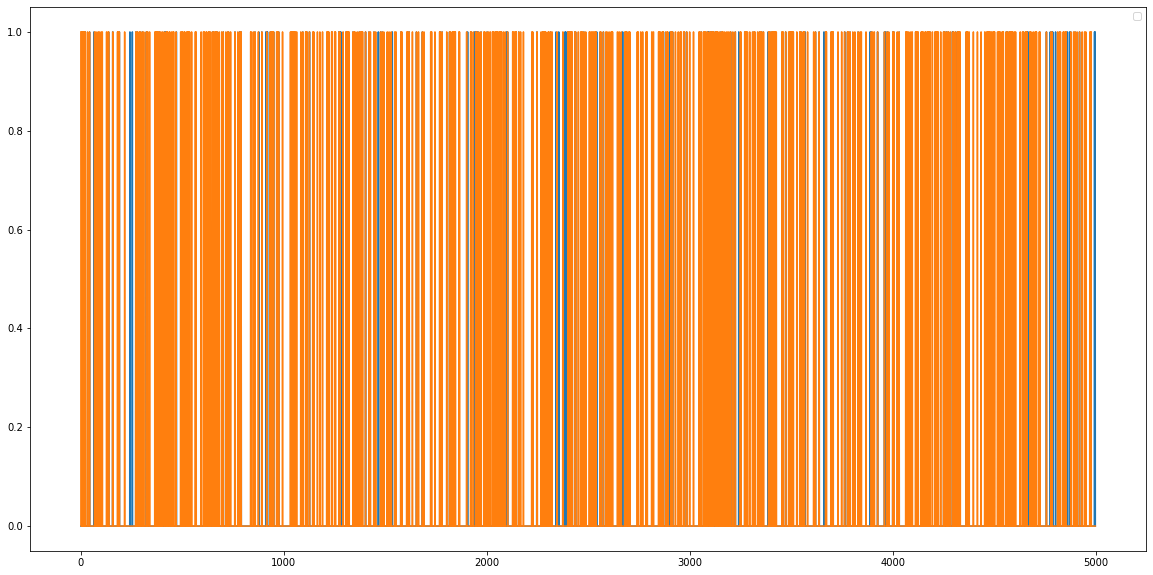

In [29]:
#we plot data to see defrence 
plt.figure(figsize=(20,10))
plt.plot(df["prediction"][:5000])
plt.plot(df["current"][:5000])
plt.legend()

In [20]:
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(df["prediction"],df["current"]))
print('Test Score: %.8f RMSE' % (testScore))

Test Score: 0.31757123 RMSE


In [22]:
if testScore < df["current"].std():
    print('\n[ Model performance is GOOD enough ]')
    print('\nRMSE of test prediction < Standard deviation of test dataset')
    print('%.8f' % (testScore), '<', '%.8f' % (df["current"].std()))
else:
    print('\n[ Model performance is NOT GOOD enough ]')
    print('\nRMSE of test prediction > Standard deviation of test dataset')
    print('%.8f' % (testScore), '>', '%.8f' % (df["current"].std()))



[ Model performance is GOOD enough ]

RMSE of test prediction < Standard deviation of test dataset
0.31757123 < 0.32222299


In [23]:
#the last etape is to transfer output to yes or no
#data should be in this order of variable
def calssifcation(model,data):
    result=[]
    x=data.drop(["y"],axis=1)
    predction=model.predict(x)
    for i in predction:
        if i==0:
            result.append("no")
        else:
            result.append("yes")
    data["result"]=result
    return data

In [26]:
#exemple for data 100 donee
dt=pd.read_csv("/content/drive/MyDrive/data/bank_.csv") #transfer data cv to pandas)
calssifcation(model,dt.iloc[:50])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,result
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,no
